# Group Number :- 6-B
# Roll Numbers :- 2210993837 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(n_features):
    np.random.seed(42)
    W = np.random.randn(n_features, 1) * 0.01  
    b = 0
    return W, b

# Forward propagation
def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return A

# Compute binary cross-entropy loss
def compute_loss(A, Y):
    m = Y.shape[0]
    epsilon = 1e-8  
    loss = -np.mean(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
    return loss

# Backward propagation
def backward_propagation(X, A, Y):
    m = X.shape[0]
    dW = np.dot(X.T, (A - Y)) / m
    db = np.sum(A - Y) / m
    return dW, db

# Update parameters
def update_parameters(W, b, dW, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

# Training function
def train_logistic_regression(X_train, y_train, learning_rate, num_epochs, batch_size):
    n_features = X_train.shape[1]
    W, b = initialize_parameters(n_features)
    m = X_train.shape[0]
    losses = []
    
    for epoch in range(num_epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train.iloc[indices]
        y_train = y_train.iloc[indices]

        for i in range(0, m, batch_size):
            X_batch = X_train.iloc[i:i+batch_size].values
            y_batch = y_train.iloc[i:i+batch_size].values.reshape(-1, 1)
            
            A = forward_propagation(X_batch, W, b)
            loss = compute_loss(A, y_batch)
            dW, db = backward_propagation(X_batch, A, y_batch)
            W, b = update_parameters(W, b, dW, db, learning_rate)

        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return W, b, losses

# Load and preprocess dataset
file_path = "covid_small.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Replace 97 and 99 with NaN
df.replace([97, 99], np.nan, inplace=True)
df.drop(columns=['INTUBED', 'ICU', 'DATE_DIED'], inplace=True)

df['PNEUMONIA'].fillna(df['PNEUMONIA'].mode()[0], inplace=True)
df['PREGNANT'].fillna(df['PREGNANT'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Encode categorical variables
categorical_cols = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 
                    'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 
                    'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']

for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# Normalize numerical features
scaler = StandardScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])

# Split dataset
X = df.drop(columns=['CLASIFFICATION_FINAL'])
y = df['CLASIFFICATION_FINAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
learning_rate = 0.01
num_epochs = 100
batch_size = 64
W_logistic, b_logistic, losses_logistic = train_logistic_regression(X_train, y_train, learning_rate, num_epochs, batch_size)


C:\Users\shail\AppData\Local\Temp\ipykernel_6632\2969820490.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PNEUMONIA'].fillna(df['PNEUMONIA'].mode()[0], inplace=True)
C:\Users\shail\AppData\Local\Temp\ipykernel_6632\2969820490.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Epoch 0: Loss = -5.7565
Epoch 10: Loss = -14.6790
Epoch 20: Loss = -12.3764
Epoch 30: Loss = -6.0443
Epoch 40: Loss = -11.5129
Epoch 50: Loss = -10.9373
Epoch 60: Loss = -8.9225
Epoch 70: Loss = -7.4834
Epoch 80: Loss = -7.1956
Epoch 90: Loss = -7.7712


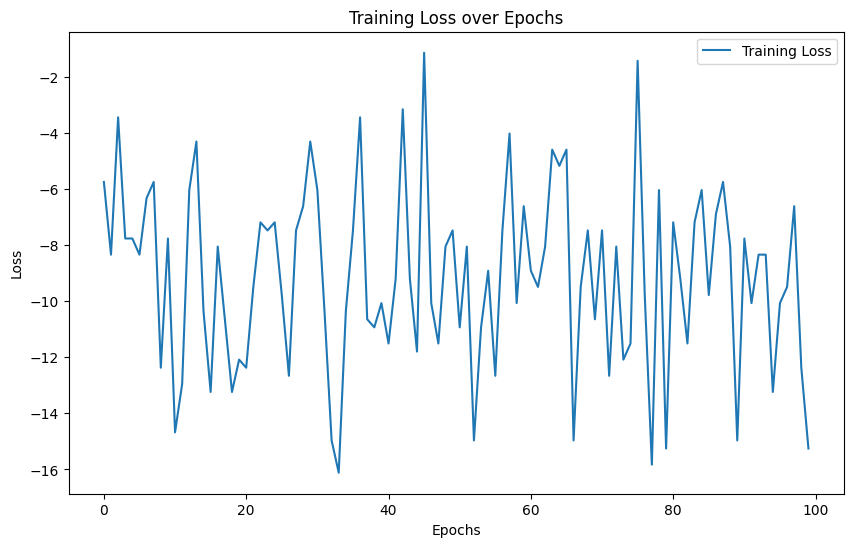

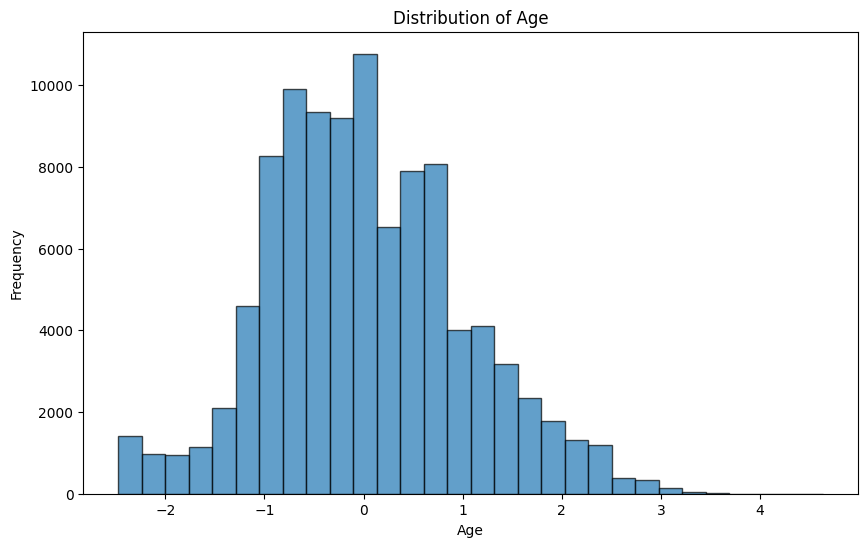

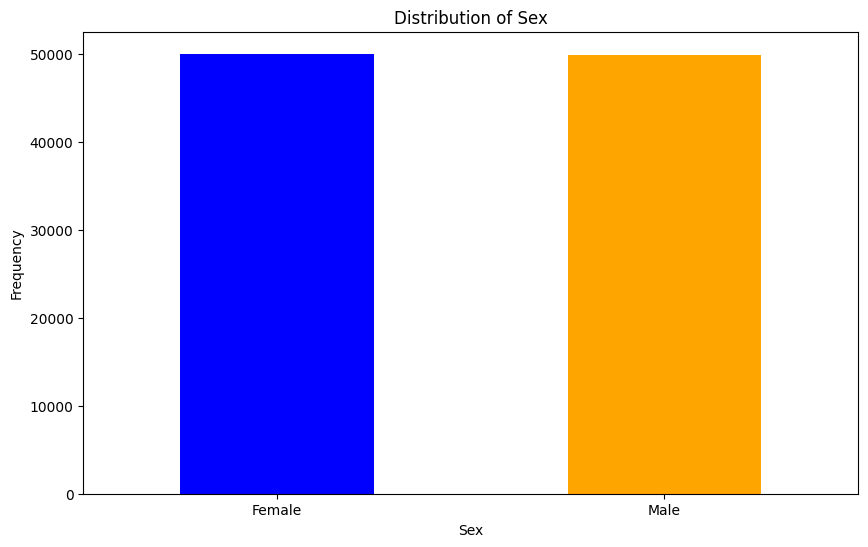

In [3]:
import matplotlib.pyplot as plt

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses_logistic, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Visualize the distribution of the 'AGE' feature
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Visualize the distribution of the 'SEX' feature
plt.figure(figsize=(10, 6))
df['SEX'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

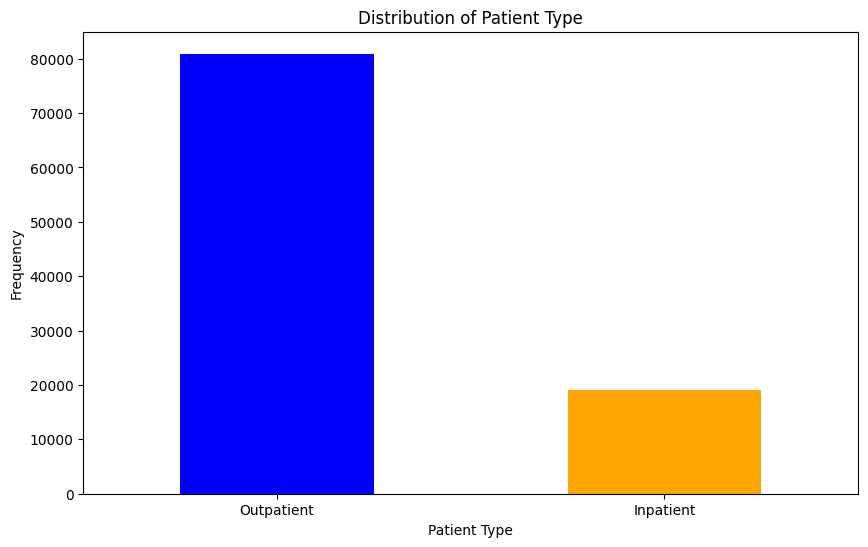

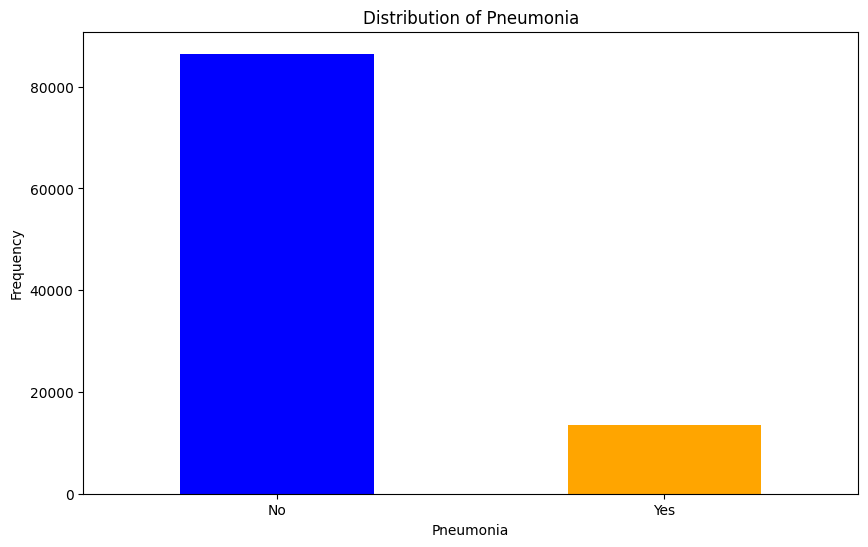

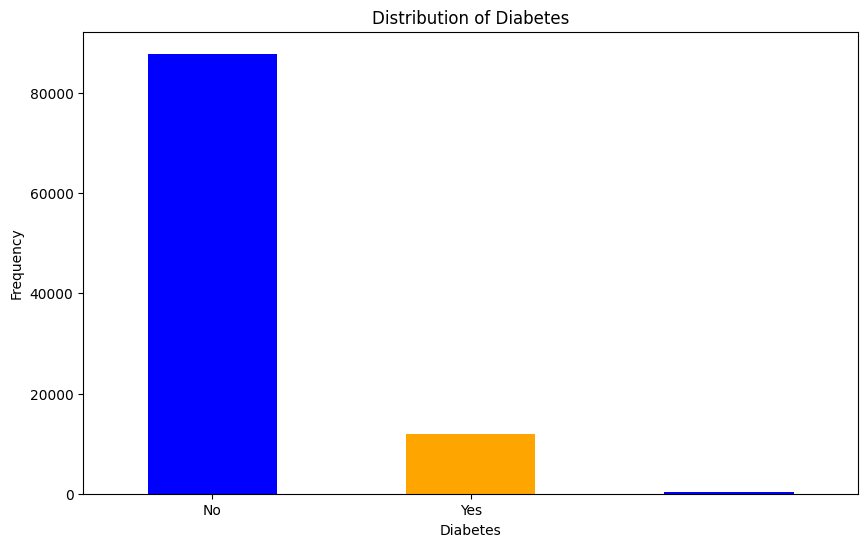

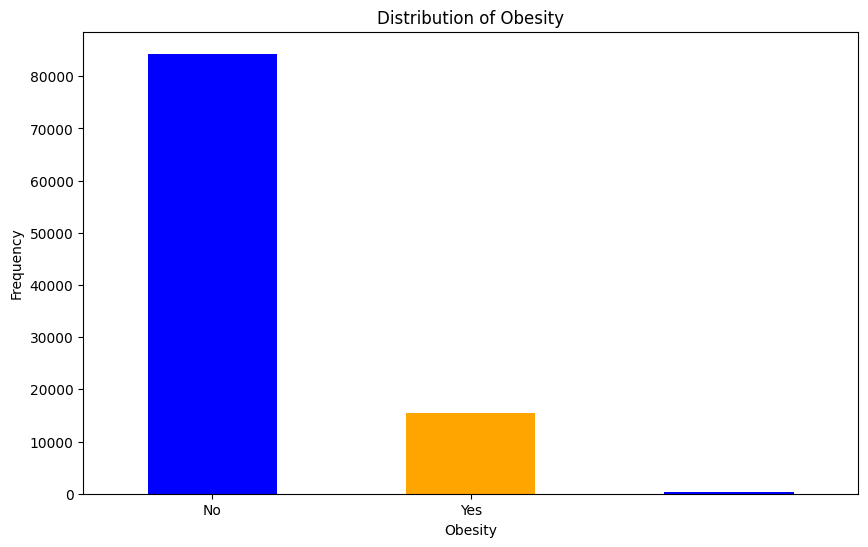

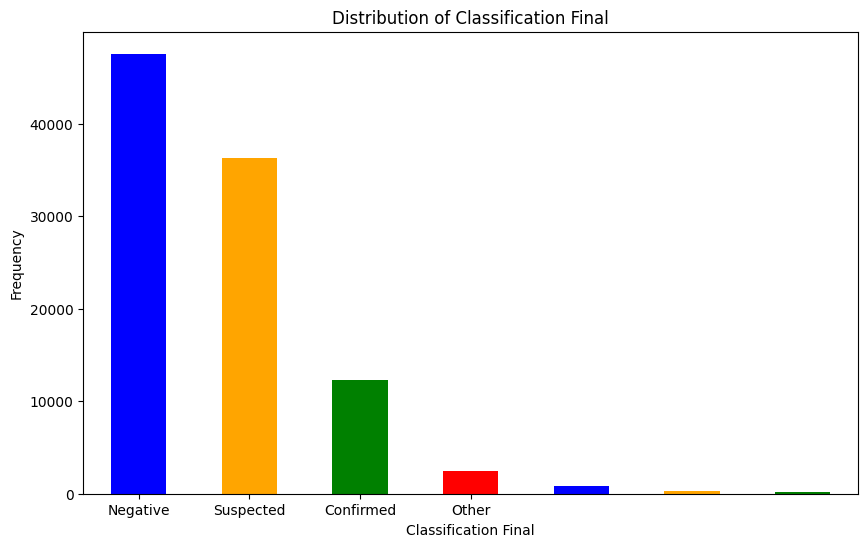

In [4]:
# Visualize the distribution of the 'PATIENT_TYPE' feature
plt.figure(figsize=(10, 6))
df['PATIENT_TYPE'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Patient Type')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Type')
plt.xticks(ticks=[0, 1], labels=['Outpatient', 'Inpatient'], rotation=0)
plt.show()

# Visualize the distribution of the 'PNEUMONIA' feature
plt.figure(figsize=(10, 6))
df['PNEUMONIA'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Pneumonia')
plt.ylabel('Frequency')
plt.title('Distribution of Pneumonia')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Visualize the distribution of the 'DIABETES' feature
plt.figure(figsize=(10, 6))
df['DIABETES'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Visualize the distribution of the 'OBESITY' feature
plt.figure(figsize=(10, 6))
df['OBESITY'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.title('Distribution of Obesity')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Visualize the distribution of the 'CLASIFFICATION_FINAL' feature
plt.figure(figsize=(10, 6))
df['CLASIFFICATION_FINAL'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classification Final')
plt.ylabel('Frequency')
plt.title('Distribution of Classification Final')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Negative', 'Suspected', 'Confirmed', 'Other'], rotation=0)
plt.show()